# Emotional Analysis of Student Feedback from RMP data

We have already created a csv file with the necessary data extracted and engineered. We are going to take the "Comments" column from that data first and analyze emotions with that data.

### Preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

data_dir = '/content/drive/MyDrive/Colab Notebooks/CSCI 5541 Final Project/'
file_path = f"{data_dir}UMN_CS_Professors_Ratings.csv"

data = pd.read_csv(file_path)

print(data.head())


                Name  Teacher ID        Department  Rating Difficulty  \
0      Phillip Barry      410470  Computer Science     3.5        62%   
1       John Bartucz     2977279  Computer Science     4.7       100%   
2       Daniel Boley      309254  Computer Science     2.2         0%   
3  Stevie Chancellor     2783392  Computer Science     3.7        67%   
4   Abhishek Chandra     1692316  Computer Science     4.1        83%   

   Total Ratings Would Take Again Rating Class  \
0             45              62%         good   
1              3             100%         good   
2             24               0%         poor   
3              3              67%         good   
4             46              83%         good   

                                            Comments  \
0  {'CSCI2011': ["2011 was harder than it should'...   
1  {'CI4311W': ['Professor is an understanding gu...   
2  {'CSCI5302': ['Examples are given in class, bu...   
3  {'CSCI5115': ["Not the most inter

In [ ]:
# Flattening the comments:

comments_data = []
for index, row in data.iterrows():
    professor = row["Name"]
    courses = eval(row["Comments"])
    for course, comments in courses.items():
        for comment in comments:
            comments_data.append({
                "Professor": professor,
                "Course": course,
                "Comment": comment,
                "Rating": row["Rating"],
                "Difficulty": row["Difficulty"],
                "Top Tags": eval(row["Top Tags"])
            })

comments_df = pd.DataFrame(comments_data)
print(comments_df.head())


       Professor    Course                                            Comment  \
0  Phillip Barry  CSCI2011  2011 was harder than it should've been. I foun...   
1  Phillip Barry  CSCI2011  I wholeheartedly agree with the previous revie...   
2  Phillip Barry  CSCI2011  He's a good professor and lecturer, it's just ...   
3  Phillip Barry  CSCI2011  He is a great lecturer, but the class itself i...   
4  Phillip Barry  CSCI2011  I liked this class. I think you'll dislike it ...   

   Rating Difficulty                                           Top Tags  
0     3.5        62%  [Lots of homework, Get ready to read, Clear gr...  
1     3.5        62%  [Lots of homework, Get ready to read, Clear gr...  
2     3.5        62%  [Lots of homework, Get ready to read, Clear gr...  
3     3.5        62%  [Lots of homework, Get ready to read, Clear gr...  
4     3.5        62%  [Lots of homework, Get ready to read, Clear gr...  


In [ ]:
%pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.1 MB/s eta 0:00:00


In [ ]:
# Not sure if this is necessary -- but we can do some initial sentiment analysis for sanity check
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def analyze_sentiment(comment):
    scores = analyzer.polarity_scores(comment)
    return scores["compound"], scores["pos"], scores["neu"], scores["neg"]

print("Starting sentiment analysis...")
comments_df[["Sentiment_Score", "Positive", "Neutral", "Negative"]] = comments_df["Comment"].apply(
    lambda x: pd.Series(analyze_sentiment(x))
)
print("Sentiment analysis complete.")
print("Sample of Sentiment Analysis Results:")
print(comments_df[["Comment", "Sentiment_Score", "Positive", "Neutral", "Negative"]].head())

Starting sentiment analysis...
Sentiment analysis complete.
Sample of Sentiment Analysis Results:
                                             Comment  Sentiment_Score  \
0  2011 was harder than it should've been. I foun...          -0.7967   
1  I wholeheartedly agree with the previous revie...           0.8558   
2  He's a good professor and lecturer, it's just ...           0.9082   
3  He is a great lecturer, but the class itself i...           0.8052   
4  I liked this class. I think you'll dislike it ...           0.7246   

   Positive  Neutral  Negative  
0     0.068    0.742     0.190  
1     0.211    0.760     0.029  
2     0.197    0.764     0.039  
3     0.200    0.705     0.095  
4     0.183    0.715     0.102  


In [ ]:
from transformers import pipeline

emotion_classifier = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", return_all_scores=True)

def detect_emotions(comment):
    # print(f"Analyzing Comment: {comment}")
    emotions = emotion_classifier(comment)
    emotions_dict = {e['label']: e['score'] for e in emotions[0]}
    # print(f"Detected Emotions: {emotions_dict}")
    return emotions_dict

comments_df["Emotions"] = comments_df["Comment"].apply(detect_emotions)

print("Sample of Emotion Detection Results:")
print(comments_df[["Comment", "Emotions"]].head())


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/294 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


Sample of Emotion Detection Results:
                                             Comment  \
0  2011 was harder than it should've been. I foun...   
1  I wholeheartedly agree with the previous revie...   
2  He's a good professor and lecturer, it's just ...   
3  He is a great lecturer, but the class itself i...   
4  I liked this class. I think you'll dislike it ...   

                                            Emotions  
0  {'anger': 0.6978821754455566, 'disgust': 0.055...  
1  {'anger': 0.0022890386171638966, 'disgust': 0....  
2  {'anger': 0.13209812343120575, 'disgust': 0.39...  
3  {'anger': 0.006947672460228205, 'disgust': 0.0...  
4  {'anger': 0.03516511991620064, 'disgust': 0.07...  


# Key Word Analysis

In [ ]:
!pip install --upgrade gensim

Loops through each Professor and saves a Word Cloud, Bar Graph which shows number of occurrences for each of the tags, and a Pie Chart which shows how common the tags are compared to each other into the Key Word Analysis folder.

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from gensim.models import Phrases
from gensim.models.phrases import Phraser
import pandas as pd
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

nltk.download('stopwords')
nltk.download('wordnet')

# creating a list of custom stopwords to look for in comments
custom_stopwords = set(stopwords.words('english')).union(
    {'class', 'professor', 'students', 'lectures', 'course', 'homework', 'assignments',
     'great', 'good', 'material', 'hes', 'dont', 'to', 'and', 'the', 'in', 'is', 'of',
     'much', 'like', 'really', 'time', 'well'}
)

# preprocessing text
def preprocess_text(text):
    lemmatizer = WordNetLemmatizer()
    text = text.lower()  # Lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in custom_stopwords])
    return text

# making a list of professors, used to loop through and generate plots/key words for each in one click
professor_names = comments_df["Professor"].unique()

# to save plots later on
save_path = "/content/drive/MyDrive/Colab Notebooks/CSCI 5541 Final Project/Professor_Visualizations/Key Word Analysis"
os.makedirs(save_path, exist_ok=True)

# creating a tag dictionary. the model looks for key words and associates them with the given tag
tags_dict = {
    "Lots of homework": ['homework', 'time consuming', 'project', 'workload'],
    "Tough grader": ['harsh', 'grading', 'tough', 'grade', 'points'],
    "Clear grading criteria": ['clear', 'grading', 'criteria', 'fair grading'],
    "Lecture can be boring": ['boring', 'lecture', 'unengaging', 'monotone'],
    "Helpful professor": ['help', 'professor', 'supportive', 'approachable'],
    "Difficult exams": ['exam', 'test', 'difficult', 'challenging', 'assessments'],
    "Get ready to read": ['material', 'reading', 'papers', 'texts'],
    "Group projects": ['group work', 'collaboration', 'teamwork', 'group assignments'],
    "Interactive classes": ['interactive', 'engagement', 'discussion', 'class participation'],
    "Classroom discussions": ['discussions', 'participation', 'debates', 'dialogue'],
    "Time management": ['deadline', 'time consuming', 'stressful', 'overwhelming'],
    "Challenging course": ['difficult', 'challenging', 'hard', 'tough', 'complex material'],
    "Clear explanations": ['clear', 'understand', 'explanations', 'examples'],
    "Test heavy": ['test', 'exam', 'quizzes', 'assessments', 'frequent exams'],
    "Frequent quizzes": ['quizzes', 'frequent', 'tests', 'assessment'],
    "Easy to pass": ['easy', 'pass', 'grading', 'lenient grading'],
    "Flexible deadlines": ['flexible', 'self-paced', 'adjustable deadlines'],
    "Professor gives feedback": ['feedback', 'helpful', 'comments', 'guidance'],
    "Organized course": ['organization', 'structured', 'clear syllabus'],
    "Lectures are engaging": ['engaging', 'interactive', 'real-world examples', 'multimedia'],
    "Supportive learning environment": ['supportive', 'inclusive', 'approachable professor'],
    "Online resources helpful": ['online', 'virtual', 'resources', 'helpful'],
    "Not much homework": ['homework', 'few assignments', 'light workload'],
    "Easy to fail": ['difficult', 'harsh', 'failure', 'unforgiving'],
    "Attendance matters": ['attendance', 'participation', 'class requirement'],
    "Real-world examples": ['real-world', 'practical', 'examples', 'application'],
    "Stressful workload": ['stressful', 'overwhelming', 'high workload', 'deadline pressure']
}

# loop through each professor and process
for professor_name in professor_names:

    # only use comments for current professor
    filtered_comments_df = comments_df[comments_df["Professor"] == professor_name]

    if filtered_comments_df.empty:
        print(f"No comments found for Professor {professor_name}.")
        continue

    # preprocess the comments for the specific professor
    comments = filtered_comments_df["Comment"].apply(preprocess_text).tolist()

    # tokenize comments and detect bigrams/trigrams
    tokenized_comments = [comment.split() for comment in comments]
    bigram_model = Phrases(tokenized_comments, min_count=2, threshold=5)  # detects bigrams
    bigram_phraser = Phraser(bigram_model)
    trigram_model = Phrases(bigram_model[tokenized_comments], min_count=2, threshold=5)  # detects trigrams
    trigram_phraser = Phraser(trigram_model)
    comments_with_phrases = [' '.join(trigram_phraser[bigram_phraser[comment]]) for comment in tokenized_comments]

    # vectorize comments with TF-IDF (converts into numerical reprentations to help idetify unique words, reduce noise, and prep for ML)
    tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=1000)  # uses unigrams, bigrams, and trigrams
    tfidf_vectors = tfidf_vectorizer.fit_transform(comments_with_phrases)

    # LDA Topic Modeling
    lda = LatentDirichletAllocation(n_components=5, random_state=42)
    lda.fit(tfidf_vectors)

    # extract topics using phrases
    topics = lda.components_
    n_top_phrases = 15
    topic_keywords = {}

    for idx, topic in enumerate(topics):
        top_indices = topic.argsort()[-n_top_phrases:][::-1]  # Top phrases for each topic
        topic_keywords[f"Topic {idx+1}"] = [tfidf_vectorizer.get_feature_names_out()[i] for i in top_indices]

    # map topics to tags
    extracted_tags = set()
    for topic, phrases in topic_keywords.items():
        for tag, keywords in tags_dict.items():
            if any(keyword in phrases for keyword in keywords):
                extracted_tags.add(tag)

    # count tag occurrences (for plotting)
    def count_tag_occurrences(comments, tags_dict):
        tag_counts = {tag: 0 for tag in tags_dict}
        for comment in comments:
            for tag, phrases in tags_dict.items():
                if any(phrase in comment for phrase in phrases):
                    tag_counts[tag] += 1
        return tag_counts

    # get counts of tag occurrences based on important phrases
    tag_counts = count_tag_occurrences(comments, tags_dict)

    sorted_tag_counts = sorted(tag_counts.items(), key=lambda x: x[1], reverse=True)

    # extract sorted tags and counts for plotting
    tags = [tag for tag, _ in sorted_tag_counts]
    counts = [count for _, count in sorted_tag_counts]



    # 1. Bar Plot of Tag Occurrences
    plt.figure(figsize=(25, 6))
    sns.barplot(x=counts, y=tags, palette='viridis')
    plt.title(f'Tag Occurrences for Professor {professor_name}')
    plt.xlabel('Number of Comments')
    plt.ylabel('Tags')
    bar_plot_path = os.path.join(save_path, f'{professor_name}_tag_occurrences.png')
    plt.savefig(bar_plot_path)
    plt.close()

    # 2. Word Cloud of Tags Based on Occurrences
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tag_counts)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud of Tags for Professor {professor_name}')
    wordcloud_path = os.path.join(save_path, f'{professor_name}_wordcloud.png')
    plt.savefig(wordcloud_path)
    plt.close()

    # 3. Pie Chart of Tag Distribution with "Other" Category
    threshold = 3  # Tags with less than 3% will be grouped into "Other", helps visualize better
    total_count = sum(counts)
    tag_data = [(tag, count, (count / total_count) * 100) for tag, count in zip(tags, counts)]
    main_tags = [(tag, count) for tag, count, pct in tag_data if pct >= threshold]
    other_count = sum(count for tag, count, pct in tag_data if pct < threshold)

    if other_count > 0:
        main_tags.append(('Other', other_count))

    main_tags_labels = [tag for tag, _ in main_tags]
    main_tags_sizes = [count for _, count in main_tags]

    plt.figure(figsize=(8, 8))
    plt.pie(main_tags_sizes, labels=main_tags_labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3", len(main_tags)))
    plt.title(f'Distribution of Tags for Professor {professor_name}')
    pie_chart_path = os.path.join(save_path, f'{professor_name}_pie_chart.png')
    plt.savefig(pie_chart_path)
    plt.close()

    print(f"Generated visualizations for Professor {professor_name}")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<ipython-input-20-a70459c17516>:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=tags, palette='viridis')


Generated visualizations for Professor Phillip Barry


<ipython-input-20-a70459c17516>:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=tags, palette='viridis')


Generated visualizations for Professor John Bartucz


<ipython-input-20-a70459c17516>:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=tags, palette='viridis')


Generated visualizations for Professor Daniel Boley


<ipython-input-20-a70459c17516>:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=tags, palette='viridis')


Generated visualizations for Professor Stevie Chancellor


<ipython-input-20-a70459c17516>:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=tags, palette='viridis')


Generated visualizations for Professor Abhishek Chandra


<ipython-input-20-a70459c17516>:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=tags, palette='viridis')


Generated visualizations for Professor Zhu-Tian Chen


<ipython-input-20-a70459c17516>:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=tags, palette='viridis')


Generated visualizations for Professor Yao-Yi Chiang


<ipython-input-20-a70459c17516>:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=tags, palette='viridis')


Generated visualizations for Professor Karthik Desingh


<ipython-input-20-a70459c17516>:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=tags, palette='viridis')


Generated visualizations for Professor Chris Dovolis


<ipython-input-20-a70459c17516>:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=tags, palette='viridis')


Generated visualizations for Professor Andrew Exley


<ipython-input-20-a70459c17516>:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=tags, palette='viridis')


Generated visualizations for Professor Kuen-Bang Favonia


<ipython-input-20-a70459c17516>:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=tags, palette='viridis')


Generated visualizations for Professor Mattia Fazzini


<ipython-input-20-a70459c17516>:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=tags, palette='viridis')


Generated visualizations for Professor Samuel Fountain


<ipython-input-20-a70459c17516>:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=tags, palette='viridis')


Generated visualizations for Professor Shonal Gangopadhyay


<ipython-input-20-a70459c17516>:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=tags, palette='viridis')


Generated visualizations for Professor Maria Gini


<ipython-input-20-a70459c17516>:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=tags, palette='viridis')


Generated visualizations for Professor Stephen Guy


<ipython-input-20-a70459c17516>:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=tags, palette='viridis')


Generated visualizations for Professor Mats Heimdahl


<ipython-input-20-a70459c17516>:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=tags, palette='viridis')


Generated visualizations for Professor Nick Hopper


<ipython-input-20-a70459c17516>:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=tags, palette='viridis')


Generated visualizations for Professor Victoria Interrante


<ipython-input-20-a70459c17516>:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=tags, palette='viridis')


Generated visualizations for Professor Volkan Isler


<ipython-input-20-a70459c17516>:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=tags, palette='viridis')


Generated visualizations for Professor Ravi Janardan


<ipython-input-20-a70459c17516>:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=tags, palette='viridis')


Generated visualizations for Professor Elizabeth Jensen


<ipython-input-20-a70459c17516>:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=tags, palette='viridis')


Generated visualizations for Professor George Karypis


<ipython-input-20-a70459c17516>:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=tags, palette='viridis')


Generated visualizations for Professor Daniel Keefe


<ipython-input-20-a70459c17516>:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=tags, palette='viridis')


Generated visualizations for Professor Daniel Kluver


<ipython-input-20-a70459c17516>:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=tags, palette='viridis')


Generated visualizations for Professor Dan Knights


<ipython-input-20-a70459c17516>:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=tags, palette='viridis')


Generated visualizations for Professor Jack Kolb


<ipython-input-20-a70459c17516>:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=tags, palette='viridis')


Generated visualizations for Professor Joseph Konstan


<ipython-input-20-a70459c17516>:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=tags, palette='viridis')


Generated visualizations for Professor Rui Kuang


<ipython-input-20-a70459c17516>:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=tags, palette='viridis')


Generated visualizations for Professor Vipin Kumar


<ipython-input-20-a70459c17516>:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=tags, palette='viridis')


Generated visualizations for Professor Kangjie Lu


<ipython-input-20-a70459c17516>:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=tags, palette='viridis')


Generated visualizations for Professor Stephen McCamant


<ipython-input-20-a70459c17516>:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=tags, palette='viridis')


Generated visualizations for Professor James Moen


<ipython-input-20-a70459c17516>:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=tags, palette='viridis')


Generated visualizations for Professor Mohamed Mokbel


<ipython-input-20-a70459c17516>:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=tags, palette='viridis')


Generated visualizations for Professor Chad Myers


<ipython-input-20-a70459c17516>:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=tags, palette='viridis')


Generated visualizations for Professor Gopalan Nadathur


<ipython-input-20-a70459c17516>:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=tags, palette='viridis')


Generated visualizations for Professor Daniel Orban


<ipython-input-20-a70459c17516>:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=tags, palette='viridis')


Generated visualizations for Professor Nikolaos Papanikolopoulos


<ipython-input-20-a70459c17516>:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=tags, palette='viridis')


Generated visualizations for Professor Hyun Soo Park


<ipython-input-20-a70459c17516>:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=tags, palette='viridis')


Generated visualizations for Professor Yousef Saad


<ipython-input-20-a70459c17516>:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=tags, palette='viridis')


Generated visualizations for Professor Junaed Sattar


<ipython-input-20-a70459c17516>:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=tags, palette='viridis')


Generated visualizations for Professor Paul Schrater


<ipython-input-20-a70459c17516>:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=tags, palette='viridis')


Generated visualizations for Professor Shashi Shekhar


<ipython-input-20-a70459c17516>:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=tags, palette='viridis')


Generated visualizations for Professor Jaideep Srivastava


<ipython-input-20-a70459c17516>:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=tags, palette='viridis')


Generated visualizations for Professor Carl Sturtivant


<ipython-input-20-a70459c17516>:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=tags, palette='viridis')


Generated visualizations for Professor Ju Sun


<ipython-input-20-a70459c17516>:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=tags, palette='viridis')


Generated visualizations for Professor Nathan Taylor


<ipython-input-20-a70459c17516>:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=tags, palette='viridis')


Generated visualizations for Professor Loren Terveen


<ipython-input-20-a70459c17516>:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=tags, palette='viridis')


Generated visualizations for Professor Anand Tripathi


<ipython-input-20-a70459c17516>:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=tags, palette='viridis')


Generated visualizations for Professor Eric Van Wyk


<ipython-input-20-a70459c17516>:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=tags, palette='viridis')


Generated visualizations for Professor Shana Watters


<ipython-input-20-a70459c17516>:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=tags, palette='viridis')


Generated visualizations for Professor Jon Weissman


<ipython-input-20-a70459c17516>:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=tags, palette='viridis')


Generated visualizations for Professor Kevin Wendt


<ipython-input-20-a70459c17516>:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=tags, palette='viridis')


Generated visualizations for Professor Pen-Chung Yew


<ipython-input-20-a70459c17516>:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=tags, palette='viridis')


Generated visualizations for Professor Antonia Zhai


<ipython-input-20-a70459c17516>:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=tags, palette='viridis')


Generated visualizations for Professor Zhi-Li Zhang


<ipython-input-20-a70459c17516>:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=tags, palette='viridis')


Generated visualizations for Professor Catherine Zhao


Plotting accuracy. This can be used alongside the code above to plot accuracy evalution metrics (only used on the backend). Can be done with one profesor at a time. The above code can be used, but the loop needs to be commented out. Not used for front-end automatic generation.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<ipython-input-17-6be52637af07>:159: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=tags, palette='viridis')


Derived Top Tags for Professor Maria Gini:
{'Tough grader', 'Test heavy', 'Easy to pass', 'Professor gives feedback', 'Difficult exams', 'Clear explanations', 'Clear grading criteria', 'Lecture can be boring'}

Topic Phrases Breakdown:
Topic 1: ['read', 'textbook', 'everything', 'feel', 'otherwise', 'attention', 'need', 'paper', 'prepared', 'lecture', 'doesnt', 'get', 'exam', 'rude', 'time everything manageable']
Topic 2: ['disorganized boring pretty', 'somewhat', 'boring pretty rude', 'boring pretty', 'disorganized', 'disorganized boring', 'pretty rude', 'somewhat disorganized', 'somewhat disorganized boring', 'make', 'gini', 'clear', 'rude', 'want', 'pretty']
Topic 3: ['opportunity extra credit', 'past apply future', 'learn past apply', 'appreciate cover history', 'credit attitude trying', 'credit attitude', 'ai giving', 'ai giving perspective', 'cover history emerging', 'cover history', 'cover', 'opportunity', 'opportunity extra', 'attitude trying', 'attitude trying inspire']
Topic 

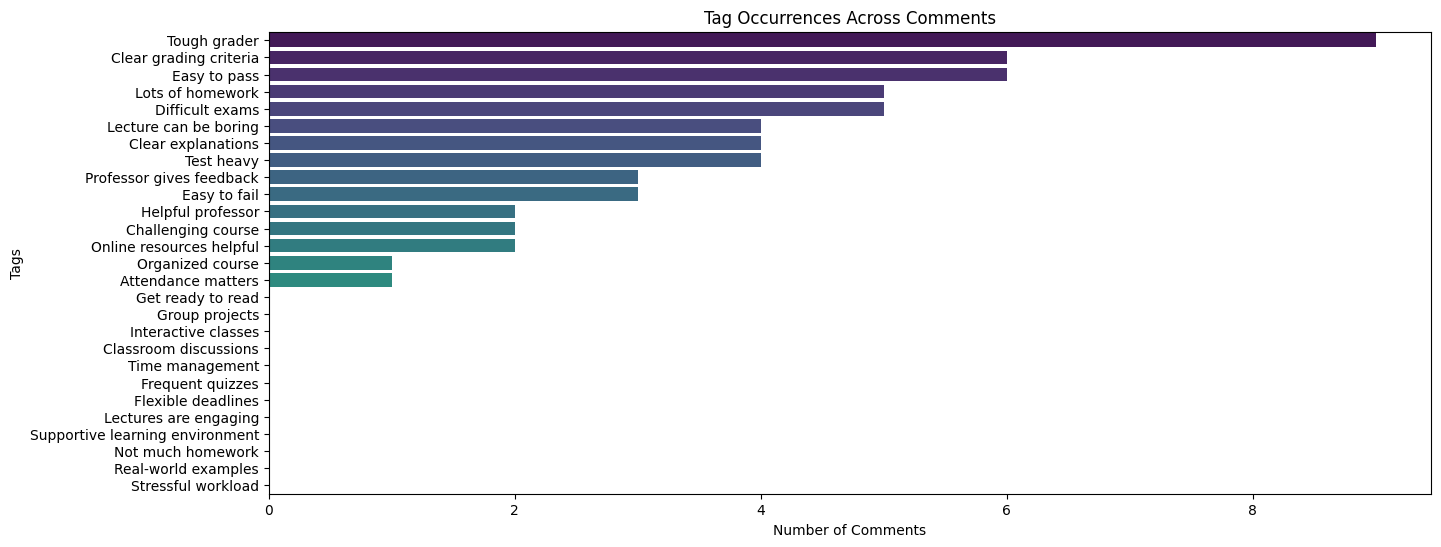

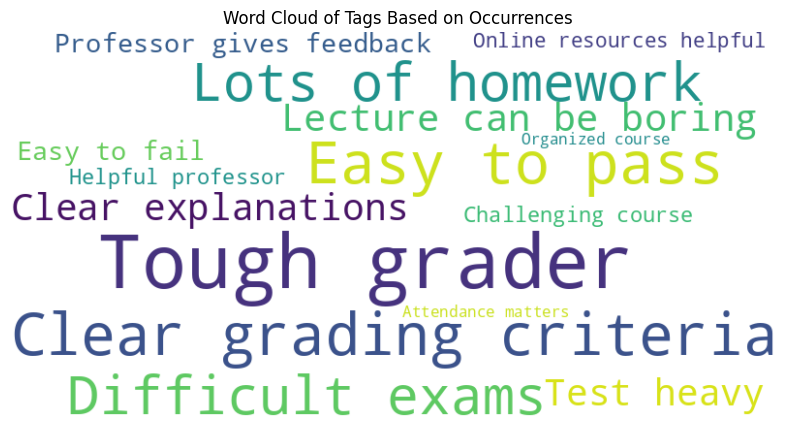

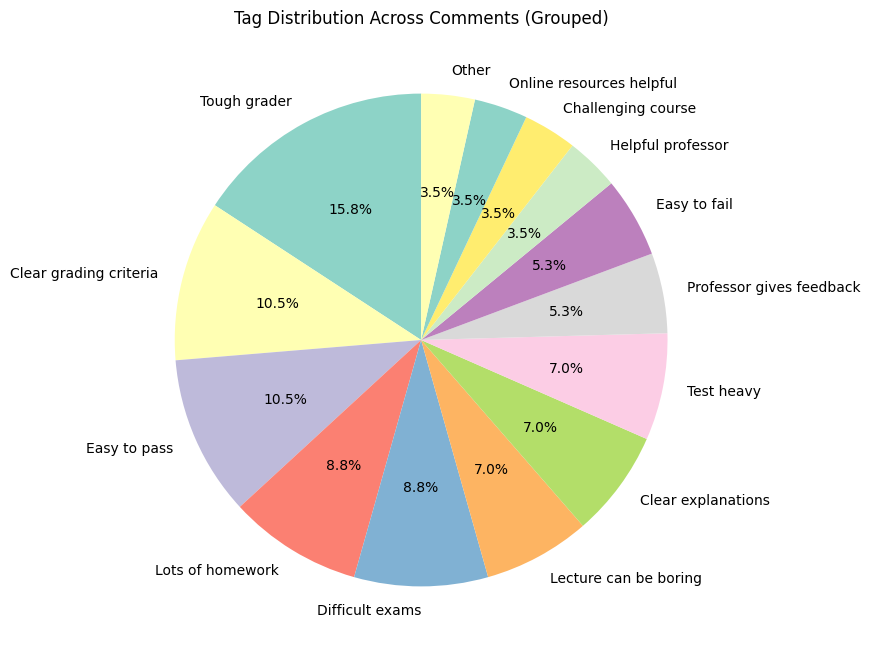

Metrics for Professor Maria Gini:
Accuracy: 20.00%
Precision: 74.07%
Recall: 74.07%
F1-Score: 74.07%


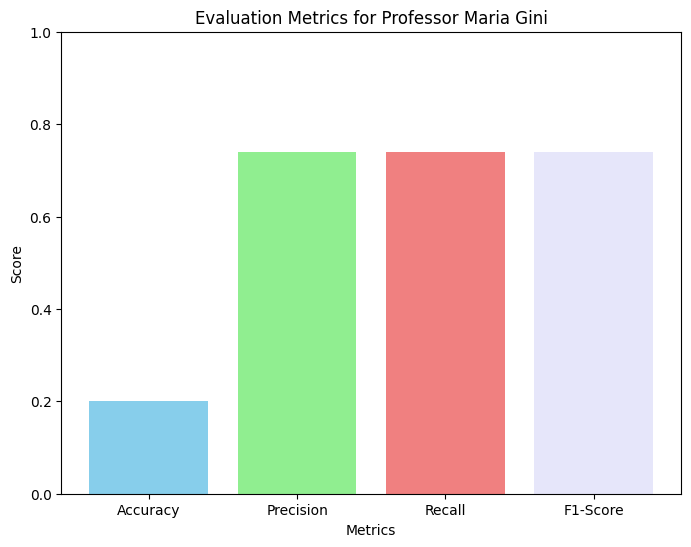

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt

# filter comments for the specific professor
filtered_comments_df = comments_df[comments_df["Professor"] == professor_name]

if filtered_comments_df.empty:
    print(f"No comments found for Professor {professor_name}.")
else:
    # prepare the actual and extracted tags
    actual_tags_list = []  # list of actual tags from the CSV
    extracted_tags_list = []  # list of extracted tags generated by the model

    for index, row in filtered_comments_df.iterrows():
        actual_tags = set(row["Top Tags"])
        extracted_tags = extracted_tags

        actual_tags_list.append(actual_tags)
        extracted_tags_list.append(extracted_tags)

    # calculate Metrics
    all_actual_tags = [tag for tags in actual_tags_list for tag in tags]
    all_extracted_tags = [tag for tags in extracted_tags_list for tag in tags]

    # convert to binary format, used for precision/recall calculations
    all_tags = list(tags_dict.keys())
    actual_binary = np.array([[1 if tag in tags else 0 for tag in all_tags] for tags in actual_tags_list])
    extracted_binary = np.array([[1 if tag in tags else 0 for tag in all_tags] for tags in extracted_tags_list])

    # calculate global metrics
    accuracy = np.mean([len(actual & predicted) / len(actual) if actual else 0 for actual, predicted in zip(actual_tags_list, extracted_tags_list)])
    precision = precision_score(actual_binary.flatten(), extracted_binary.flatten(), average="micro")
    recall = recall_score(actual_binary.flatten(), extracted_binary.flatten(), average="micro")
    f1 = f1_score(actual_binary.flatten(), extracted_binary.flatten(), average="micro")

    print(f"Metrics for Professor {professor_name}:")
    print(f"Accuracy: {accuracy:.2%}")
    print(f"Precision: {precision:.2%}")
    print(f"Recall: {recall:.2%}")
    print(f"F1-Score: {f1:.2%}")

    # plotting
    metrics = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    }

    plt.figure(figsize=(8, 6))
    plt.bar(metrics.keys(), metrics.values(), color=['skyblue', 'lightgreen', 'lightcoral', 'lavender'])

    plt.title(f"Evaluation Metrics for Professor {professor_name}")
    plt.xlabel("Metrics")
    plt.ylabel("Score")
    plt.ylim(0, 1)
    plt.show()